**Данные**

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Данные
X = np.array([-3, 1, 2, -5, 0, 3, -1, 5, 7])
Y = np.array([1.6, 1.2, 1.3, 2.0, 1.7, 1.0, 0.4, 0.5, 0.2])

**Рассчитываем эмпирический коэффициент корреляции**

In [ ]:
# Рассчитываем эмпирический коэффициент корреляции
correlation_coefficient = np.corrcoef(X, Y)[0, 1]
print(f"Эмпирический коэффициент корреляции: {correlation_coefficient:.3f}")

Эмпирический коэффициент корреляции: -0.761


**Находим эмпирические прямые регрессии**

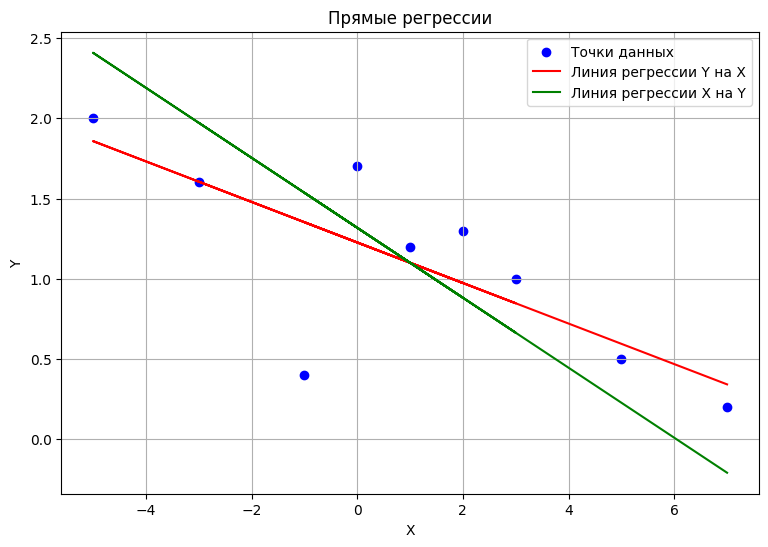


Уравнение прямой регрессии Y на X: Y = -0.126X + 1.226
Уравнение прямой регрессии X на Y: X = -4.586Y + 6.045


In [ ]:
# Рассчитываем линии регрессии
slope_Y_on_X, intercept_Y_on_X, r_value_Y_on_X, p_value_Y_on_X, std_err_Y_on_X = stats.linregress(X, Y)
slope_X_on_Y, intercept_X_on_Y, r_value_X_on_Y, p_value_X_on_Y, std_err_X_on_Y = stats.linregress(Y, X)

# Линии регрессии
regression_line_Y_on_X = intercept_Y_on_X + slope_Y_on_X * X
regression_line_X_on_Y = (X - intercept_X_on_Y) / slope_X_on_Y

# Построение графика
plt.figure(figsize=(9, 6))
plt.scatter(X, Y, color='blue', label='Точки данных')
plt.plot(X, regression_line_Y_on_X, color='red', label='Линия регрессии Y на X')
plt.plot(X, regression_line_X_on_Y, color='green', label='Линия регрессии X на Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Прямые регрессии')
plt.legend()
plt.grid(True)
plt.show()

# Уравнение линий регрессии
print()
print(f"Уравнение прямой регрессии Y на X: Y = {slope_Y_on_X:.3f}X + {intercept_Y_on_X:.3f}")
print(f"Уравнение прямой регрессии X на Y: X = {slope_X_on_Y:.3f}Y + {intercept_X_on_Y:.3f}")

**Проверка гипотезы о незначимости коэффициента корреляции**

In [ ]:
# Проверка гипотезы о незначимости коэффициента корреляции
n = len(X)
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
df = n - 2
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df))

print(f"t-статистика: {t_statistic:.3f}")
print(f"p-значение: {p_value:.3f}")

# Интерпретация результатов
if p_value < 0.05:
    print("Коэффициент корреляции значимо отличается от нуля (p < 0.05), следовательно, существует статистически значимая связь между X и Y.")
else:
    print("Коэффициент корреляции незначимо отличается от нуля (p >= 0.05), следовательно, статистически значимой связи между X и Y нет.")

t-статистика: -3.105
p-значение: 0.017
Коэффициент корреляции значимо отличается от нуля (p < 0.05), следовательно, существует статистически значимая связь между X и Y.


**Доверительный интервал для коэффициента корреляции**

In [ ]:
# Доверительный интервал для коэффициента корреляции
alpha = 0.05
z = np.arctanh(correlation_coefficient)  # Преобразование Фишера
se = 1 / np.sqrt(n - 3)
z_critical = stats.norm.ppf(1 - alpha/2)
ci_lower = np.tanh(z - z_critical * se)
ci_upper = np.tanh(z + z_critical * se)

print(f"Доверительный интервал для коэффициента корреляции: [{ci_lower:.3f}, {ci_upper:.3f}]")
print(f"Сила и характер связи: Сильная отрицательная связь (r ≈ {correlation_coefficient:.3f})")

Доверительный интервал для коэффициента корреляции: [-0.947, -0.196]
Сила и характер связи: Сильная отрицательная связь (r ≈ -0.761)
